In [10]:
import yfinance as yf
import os, contextlib

In [11]:
sp_symbols = []
sp_symbols.append('VOO')
print('total number of S&P symbols = {}'.format(len(sp_symbols)))

total number of S&P symbols = 1


In [12]:
offset = 0
limit = 3000
period = 'max'

limit = limit if limit else len(sp_symbols)
end = min(offset + limit, len(sp_symbols))
is_valid = [False] * len(sp_symbols)
with open(os.devnull, 'w') as devnull:
    with contextlib.redirect_stdout(devnull):
        for i in range(offset, end):
            s = sp_symbols[i]
            data = yf.download(s, period=period)
            if len(data.index) == 0:
                continue
        
            is_valid[i] = True
            data.to_csv('../data/{}.csv'.format(s))

print('Total number of valid symbols downloaded = {}'.format(sum(is_valid)))

[*********************100%%**********************]  1 of 1 completed

Total number of valid symbols downloaded = 1


In [15]:
# open the VOO data as pandas dataframe
import pandas as pd
import matplotlib.pyplot as plt
voo = pd.read_csv('../data/VOO.csv')

In [16]:
# Functions to calculate technical indicators

def calculate_rsi(data):
    '''
    :param data: stock price data
    :param period: period of dates
    :return: relative strength index (RSI)
    :rtype: float
    '''
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).mean()
    loss = (-delta.where(delta < 0, 0)).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

def calculate_macd(data, short_period=12, long_period=26, signal_period=9):
    '''
    Calculates the convergence divergence moving average

    :param data: stock price data
    :param short_period: no. period used to calculate shorter exponential moving average (EMA)
    :param long_period: no. period used to calculate longer exponential moving average (EMA)
    :param signal_period: no. period to calculate the signal line
    :return:macd
    '''
    short_ema = data['Close'].ewm(span=short_period, min_periods=1).mean()
    long_ema = data['Close'].ewm(span=long_period, min_periods=1).mean()

    macd_line = short_ema - long_ema
    signal_line = macd_line.ewm(span=signal_period, min_periods=1).mean()

    return macd_line, signal_line

def calculate_sma(data, window):
    '''
    Calculates the single moving average

    :param data: stock price data of one ticker
    :param window: size of the sliding window (no. of days)
    :return:
    '''
    sma = data['Close'].rolling(window=window).mean()
    return sma

          Date        Open        High         Low       Close  Adj Close  \
0   2010-09-09  102.500000  102.500000  101.139999  101.320000  78.490952   
1   2010-09-10  101.680000  101.860001  101.300003  101.779999  78.847305   
2   2010-09-13  102.959999  103.139999  102.500000  103.059998  79.838921   
3   2010-09-14  102.839996  103.480003  102.379997  103.040001  79.823387   
4   2010-09-15  102.620003  103.379997  102.400002  103.300003  80.024826   
5   2010-09-16  103.019997  103.320000  102.699997  103.260002  79.993843   
6   2010-09-17  103.879997  103.879997  103.019997  103.360001  80.071297   
7   2010-09-20  103.739998  105.040001  103.459999  105.040001  81.372780   
8   2010-09-21  105.019997  105.440002  104.279999  104.720001  81.124870   
9   2010-09-22  104.559998  105.040001  103.959999  104.160004  80.691055   
10  2010-09-23  103.320000  104.339996  103.120003  103.300003  80.024826   
11  2010-09-24  103.940002  104.900002  103.860001  104.839996  81.658943   

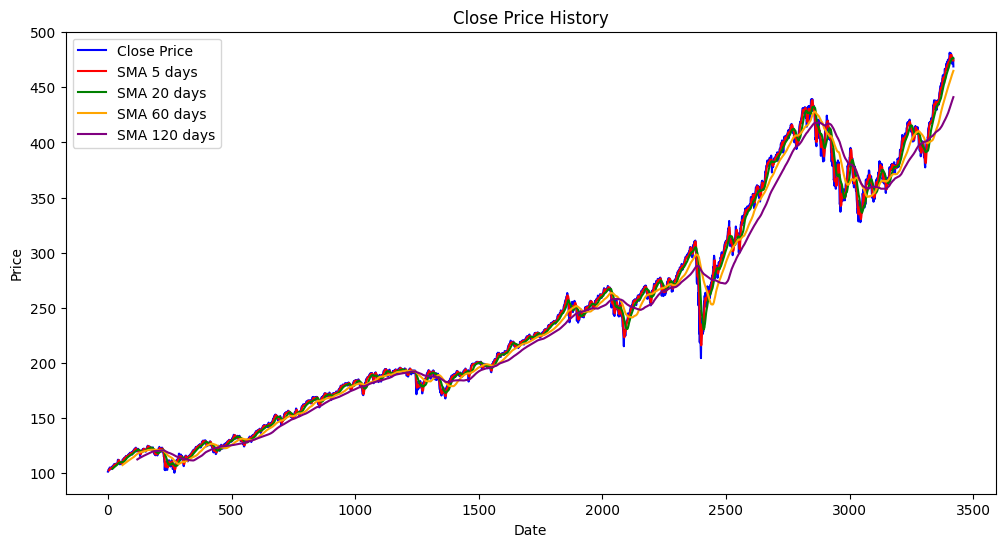

In [18]:
# calculate RSI
voo['RSI'] = voo['Close'].rolling(window=14).apply(calculate_rsi)

# calculate MACD
voo['MACD'], voo['Signal'] = calculate_macd(voo)

# calculate SMA for 5 days
voo['SMA_5'] = calculate_sma(voo, 5)

# calculate SMA for 20 days
voo['SMA_20'] = calculate_sma(voo, 20)

# calculate SMA for 60 days
voo['SMA_60'] = calculate_sma(voo, 60)

# calculate SMA for 120 days
voo['SMA_120'] = calculate_sma(voo, 120)

# print first 50 rows of the data
print(voo.head(50))

# plot the data
plt.figure(figsize=(12, 6))
plt.plot(voo['Close'], label='Close Price', color='blue')
plt.plot(voo['SMA_5'], label='SMA 5 days', color='red')
plt.plot(voo['SMA_20'], label='SMA 20 days', color='green')
plt.plot(voo['SMA_60'], label='SMA 60 days', color='orange')
plt.plot(voo['SMA_120'], label='SMA 120 days', color='purple')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()







In [ ]:
# Save VOO data with new columns
voo.to_csv('../data/VOO.csv')
